## *Blinkit Analysis*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**EXTRACT RAW DATA**

In [4]:
df=pd.read_csv("Blinkit Grocery Data.csv")

**Exploratory Data Analysis**

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


**Shape of the Data**

In [5]:
df.shape

(8523, 12)

In [6]:
df.ndim

2

In [7]:
df.size

102276

In [13]:
df.head()
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [14]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

**Transforming the data in **Item Fat Content Column** **

In [9]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [16]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

**BUISNESS REQUIREMENTS**

**KPI REQUIREMENTS**

In [10]:
#Total Sales
print('$',round(df['Sales'].sum()/1000000, 3), 'M')

$ 1.202 M


In [11]:
#Average Sales
print('$',round(df['Sales'].mean(),1))

$ 141.0


In [12]:
#Amount of Sales
print(df['Sales'].count())

8523


In [13]:
#Average Rating
print(round(df['Rating'].mean(),1))

4.0


### **CHART REQUIREMENTS**

**Total Sales by Fat Content**

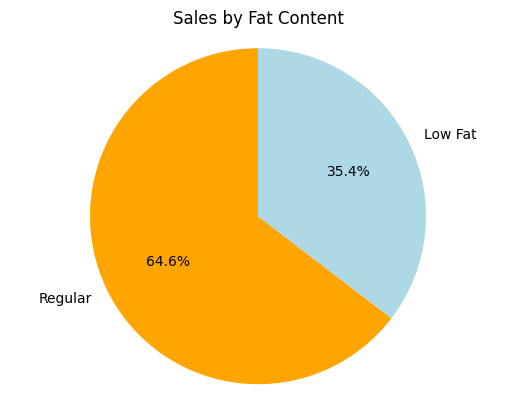

In [19]:
#Total Sales By Fat Content
plt.pie(df.groupby('Item Fat Content')['Sales'].sum(), labels=df['Item Fat Content'].unique(),autopct='%1.1f%%',colors=['orange','lightblue'],startangle=90)
plt.title("Sales by Fat Content")
plt.axis("equal")
plt.show()

**Total Sales by  Item Type**

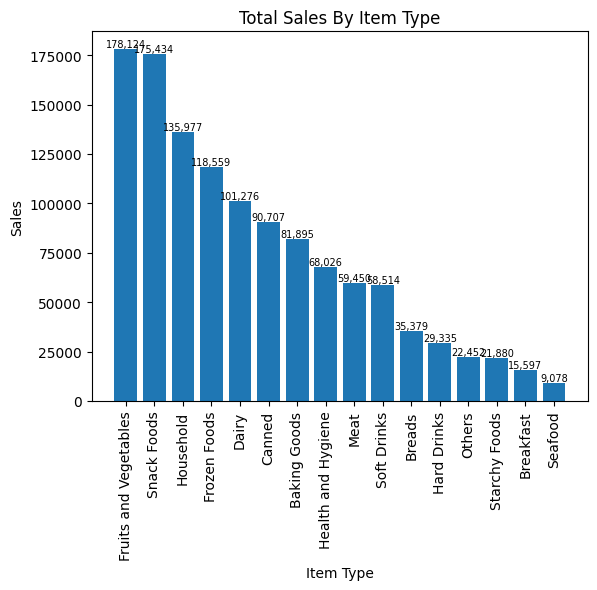

In [31]:
sales_by_type=df.groupby("Item Type")['Sales'].sum().sort_values(ascending=False)
barchart=plt.bar(sales_by_type.index,sales_by_type.values, width=0.8)
plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.title("Total Sales By Item Type")
#bar.get_x() → Gets the starting x-coordinate (left edge) of that bar.
#bar.get_width() → Gets the width of the bar
#bar.get_height() → Gets the height of the bar (sales value).
#f'{bar.get_height():,.0f}' → Formats the number (e.g., 1,234).
for bar in barchart:
    plt.text(
        bar.get_x()+bar.get_width()/2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center',va='bottom',fontsize=7)


**Fat Content by Outlet for Total Sales**

Text(0.5, 1.0, 'Total Sales By Item Type')

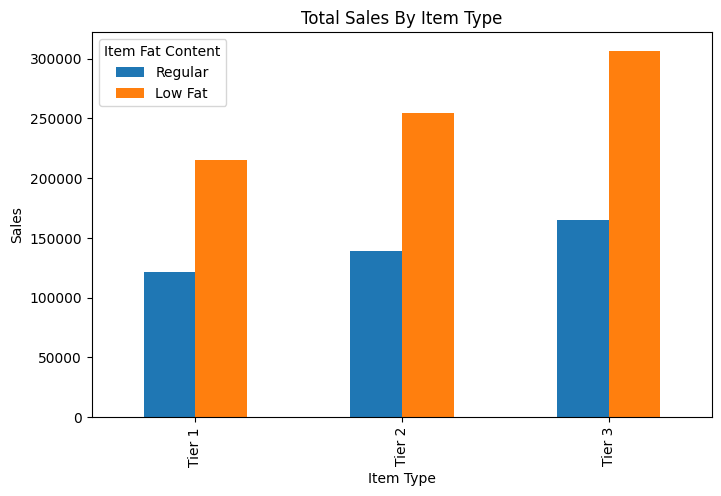

In [37]:
#Fat Content by Outlet for Total Sales
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]
ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content')
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.legend(title='Item Fat Content')
plt.title("Total Sales By Item Type")



**Total Sales by Outlet Establishment**

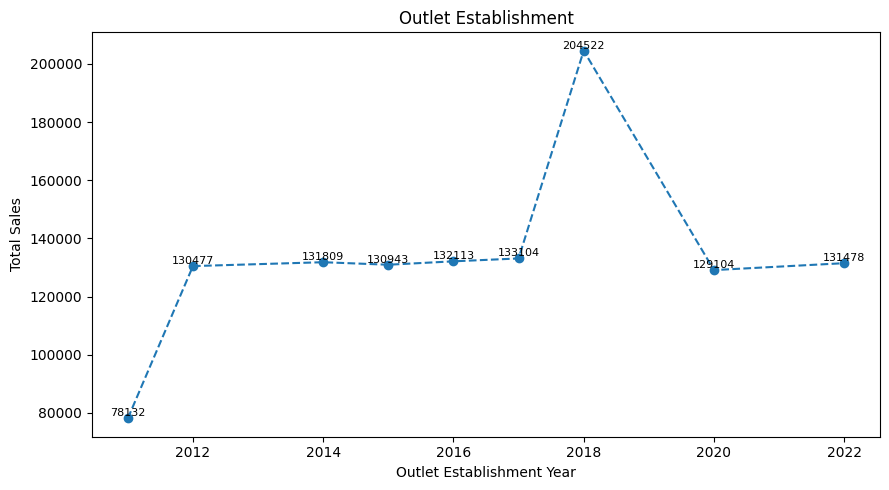

In [45]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='--')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):#syntax is important
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


**Sales by Outlet Size**

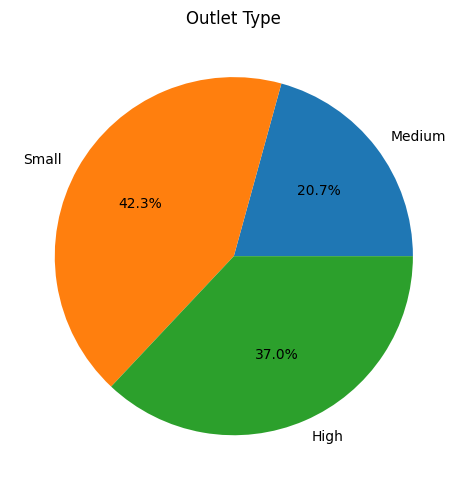

In [53]:
sales_by_year = df.groupby('Outlet Size')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.pie(sales_by_year,labels=df["Outlet Size"].unique(),autopct='%1.1f%%')


plt.title('Outlet Type')



plt.tight_layout()
plt.show()


**Sales by Outlet Location Type**

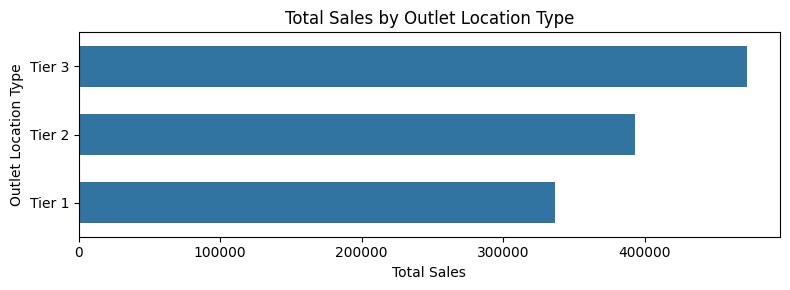

In [55]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))  # Smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location,width=0.6)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()  # Ensures layout fits without scroll
plt.show()
